In [1]:
# remove the notebook root logger.\n",
import logging
logger = logging.getLogger()
logger.handlers = []

%matplotlib inline

In [2]:
import pandas as pd


csvfile_link = "https://raw.githubusercontent.com/antoinecarme/pyaf/master/data/passengers_train.csv"
air_passengers_dataframe = pd.read_csv(csvfile_link);
import datetime
air_passengers_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
ID               144 non-null int64
time             144 non-null float64
AirPassengers    144 non-null int64
dtypes: float64(1), int64(2)
memory usage: 3.5 KB


In [3]:
def create_model(iActivateCrossVal , iFolds):
    import pyaf.ForecastEngine as autof
    lEngine = autof.cForecastEngine()
    if(iActivateCrossVal):
        lEngine.mOptions.mCrossValidationOptions.mMethod = "TSCV";
        lEngine.mOptions.mCrossValidationOptions.mNbFolds = iFolds
    lEngine.train(air_passengers_dataframe[:-12] , 'time' , 'AirPassengers', 12);
    lEngine.getModelInfo();
    return lEngine

In [4]:
model_no_cross_valid = create_model(False , None)
model_with_cross_valid_5 = create_model(True , 5)
model_with_cross_valid_10 = create_model(True , 10)


INFO:pyaf.std:START_TRAINING 'AirPassengers'
INFO:pyaf.std:END_TRAINING_TIME_IN_SECONDS 'AirPassengers' 2.3645029067993164
INFO:pyaf.std:TIME_DETAIL TimeVariable='time' TimeMin=1949.0 TimeMax=1956.91666666667 TimeDelta=0.08333333333336763 Horizon=12
INFO:pyaf.std:SIGNAL_DETAIL_ORIG SignalVariable='AirPassengers' Min=104 Max=559  Mean=262.49242424242425 StdDev=106.22114554451818
INFO:pyaf.std:SIGNAL_DETAIL_TRANSFORMED TransformedSignalVariable='_AirPassengers' Min=104 Max=559  Mean=262.49242424242425 StdDev=106.22114554451818
INFO:pyaf.std:BEST_TRANSOFORMATION_TYPE '_'
INFO:pyaf.std:BEST_DECOMPOSITION  '_AirPassengers_LinearTrend_residue_zeroCycle_residue_AR(33)' [LinearTrend + NoCycle + AR]
INFO:pyaf.std:TREND_DETAIL '_AirPassengers_LinearTrend' [LinearTrend]
INFO:pyaf.std:CYCLE_DETAIL '_AirPassengers_LinearTrend_residue_zeroCycle' [NoCycle]
INFO:pyaf.std:AUTOREG_DETAIL '_AirPassengers_LinearTrend_residue_zeroCycle_residue_AR(33)' [AR]
INFO:pyaf.std:MODEL_MAPE MAPE_Fit=0.0349 MAPE_Fore

INFO:pyaf.std:MODEL_L1 L1_Fit=7.164469425273996 L1_Forecast=10.786413393505878 L1_Test=None
INFO:pyaf.std:MODEL_L2 L2_Fit=8.942766451419976 L2_Forecast=12.324512306852741 L2_Test=None
INFO:pyaf.std:MODEL_COMPLEXITY 16
INFO:pyaf.std:AR_MODEL_DETAIL_START
INFO:pyaf.std:AR_MODEL_COEFF 1 _AirPassengers_ConstantTrend_residue_zeroCycle_residue_Lag12 0.8345744127463641
INFO:pyaf.std:AR_MODEL_COEFF 2 _AirPassengers_ConstantTrend_residue_zeroCycle_residue_Lag1 0.7123718250165103
INFO:pyaf.std:AR_MODEL_COEFF 3 _AirPassengers_ConstantTrend_residue_zeroCycle_residue_Lag13 -0.40187874062979984
INFO:pyaf.std:AR_MODEL_COEFF 4 _AirPassengers_ConstantTrend_residue_zeroCycle_residue_Lag25 -0.38961476589992594
INFO:pyaf.std:AR_MODEL_COEFF 5 _AirPassengers_ConstantTrend_residue_zeroCycle_residue_Lag24 0.34965907231433085
INFO:pyaf.std:AR_MODEL_COEFF 6 _AirPassengers_ConstantTrend_residue_zeroCycle_residue_Lag14 -0.23552166496545346
INFO:pyaf.std:AR_MODEL_COEFF 7 _AirPassengers_ConstantTrend_residue_zeroCy

In [5]:
model_no_cross_valid_forecast = model_no_cross_valid.forecast(air_passengers_dataframe, 12);
model_with_cross_valid_10_forecast = model_with_cross_valid_10.forecast(air_passengers_dataframe, 12);
model_with_cross_valid_5_forecast = model_with_cross_valid_5.forecast(air_passengers_dataframe, 12);


INFO:pyaf.std:START_FORECASTING
INFO:pyaf.std:END_FORECAST_TIME_IN_SECONDS 0.9232053756713867
INFO:pyaf.std:START_FORECASTING
INFO:pyaf.std:END_FORECAST_TIME_IN_SECONDS 0.8753044605255127
INFO:pyaf.std:START_FORECASTING
INFO:pyaf.std:END_FORECAST_TIME_IN_SECONDS 0.8743491172790527


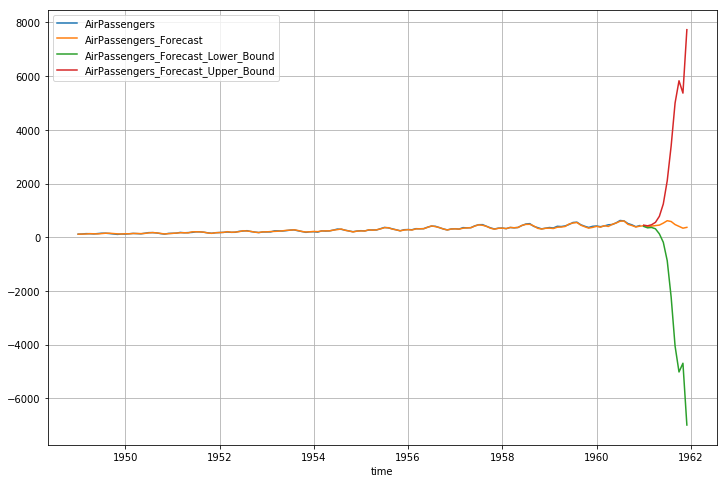

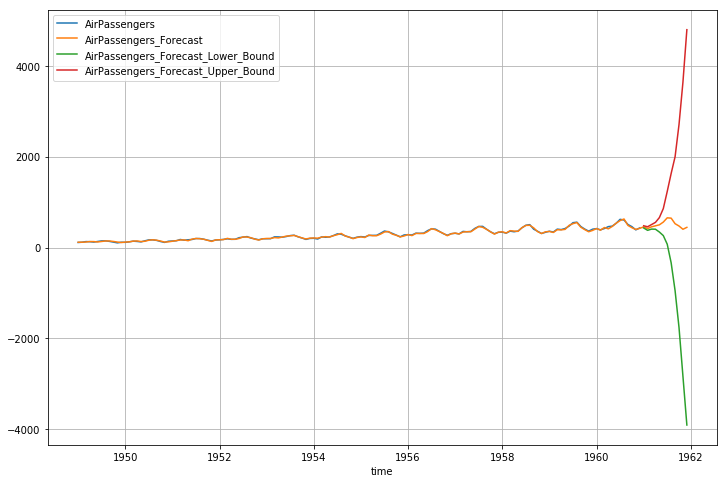

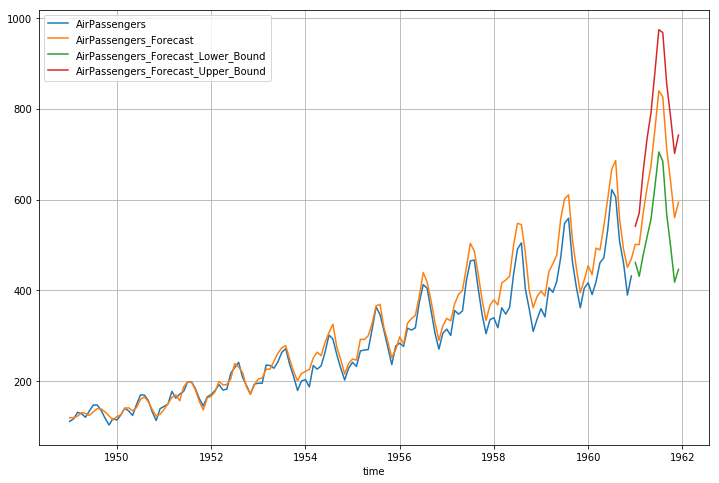

In [6]:
model_no_cross_valid_forecast.plot.line('time', ['AirPassengers' , 'AirPassengers_Forecast', 
                                             'AirPassengers_Forecast_Lower_Bound', 
                                             'AirPassengers_Forecast_Upper_Bound'], grid = True, figsize=(12, 8))
model_with_cross_valid_10_forecast.plot.line('time', ['AirPassengers' , 'AirPassengers_Forecast', 
                                             'AirPassengers_Forecast_Lower_Bound', 
                                             'AirPassengers_Forecast_Upper_Bound'], grid = True, figsize=(12, 8))
model_with_cross_valid_5_forecast.plot.line('time', ['AirPassengers' , 'AirPassengers_Forecast', 
                                             'AirPassengers_Forecast_Lower_Bound', 
                                             'AirPassengers_Forecast_Upper_Bound'], grid = True, figsize=(12, 8))
